<a href="https://colab.research.google.com/github/newtonxp/Natural_language_processing/blob/main/bag_of_n_grams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Bag of n_grams: Exercise**

- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

- Fake news spreads faster than Real news and creates problems and fear among groups and in society.

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is **Real or Fake Message**.

- You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.


### **About Data: Fake News Detection**

Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


- This data consists of two columns.
        - Text
        - label
- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given Text is Fake or Real.

- As there are only 2 classes, this problem comes under the **Binary Classification.**


In [2]:
#import pandas library
import pandas as pd

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("Fake_Real_Data.csv")


#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head()

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
#check the distribution of labels
df.label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [5]:
#Add the new column "label_num" which gives a unique number to each of these labels
df['label_nums'] = df['label'].apply(lambda x: 1 if x=='Real' else 0)

#check the results with top 5 rows
df.head()

,Text,label,label_nums
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


### **Modelling without Pre-processing Text data**

In [6]:
#import train-test-split from sklearn
from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20% with random state of 0 and stratify sampling on label.nums
x_train, x_test, y_train, y_test = train_test_split(df.Text, df.label_nums, test_size=0.2, random_state=0, stratify=df.label_nums)


In [9]:
#print the shapes of X_train and X_test
print("The data for training is:", x_train.shape)
print("The data for testing is:", x_test.shape)


The data for training is: (7920,)
The data for testing is: (1980,)


**Attempt 1** :

1. using sklearn pipeline module create a classification pipeline to classify the Data.

- using CountVectorizer with unigram, bigram, and trigrams.
- using KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
- printing the classification report.


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from  sklearn.neighbors import KNeighborsClassifier

# create a pipeline object
clf = Pipeline([
    ('Vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('Classifier', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])



# fit with X_train and y_train
clf.fit(x_train, y_train)


# get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


# print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.44      0.60      1000
           1       0.63      0.98      0.77       980

    accuracy                           0.70      1980
   macro avg       0.79      0.71      0.68      1980
weighted avg       0.79      0.70      0.68      1980



**Attempt 2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

- using CountVectorizer with unigram, bigram, and trigrams.
- using **KNN** as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
- printing the classification report.


In [13]:
# create a pipeline object
clf = Pipeline([
    ('Vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('Classifier', KNeighborsClassifier(n_neighbors=10, metric='cosine'))
])



# fit with X_train and y_train
clf.fit(x_train, y_train)


# get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


# print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70      1000
           1       0.68      1.00      0.81       980

    accuracy                           0.77      1980
   macro avg       0.84      0.77      0.76      1980
weighted avg       0.84      0.77      0.76      1980




**Attempt 3** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

- using CountVectorizer with only trigrams.
- using **RandomForest** as the classifier.
- prining the classification report.


In [15]:
from sklearn.ensemble import RandomForestClassifier

# create a pipeline object
clf = Pipeline([
    ('Vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('Classifier', RandomForestClassifier())
])



# fit with X_train and y_train
clf.fit(x_train, y_train)


# get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


# print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.99      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980




**Attempt 4** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

- using CountVectorizer with both unigram and bigrams.
- using **Multinomial Naive Bayes** as the classifier with an alpha value of 0.75.
- printing the classification report.


In [16]:
from sklearn.naive_bayes import MultinomialNB

# create a pipeline object
clf = Pipeline([
    ('Vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('Classifier', MultinomialNB(alpha=0.75))
])



# fit with X_train and y_train
clf.fit(x_train, y_train)


# get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


# print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.98      0.98      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [17]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [18]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
df['preprocessed_text'] = df['Text'].apply(preprocess)

In [19]:
#print the top 5 rows
df.head()

,Text,label,label_nums,preprocessed_text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump Surrogate BRUTALLY Stabs Pathetic vide...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow million illegally pu...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats Trump agree work immigration bill wa...


**Build a model with pre processed text**

In [20]:
# Do the 'train-test' splitting with test size of 20% with random state of 0 and stratify sampling on label_nums
x_train, x_test, y_train, y_test = train_test_split(df.preprocessed_text, df.label_nums, test_size=0.2, random_state=0, stratify=df.label_nums)




**Let's check the scores with our best model till now**
- Random Forest

**Attempt1** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

- using CountVectorizer with only trigrams.
- using **RandomForest** as the classifier.
- printing the classification report.


In [21]:
# create a pipeline object
clf = Pipeline([
    ('Vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('Classifier', RandomForestClassifier())
])



# fit with X_train and y_train
clf.fit(x_train, y_train)


# get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


# print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1000
           1       0.99      0.92      0.95       980

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



**Attempt2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

- using CountVectorizer with unigram, Bigram, and trigrams.
- using **RandomForest** as the classifier.
- printing the classification report.


In [22]:
# create a pipeline object
clf = Pipeline([
    ('Vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('Classifier', RandomForestClassifier())
])



# fit with X_train and y_train
clf.fit(x_train, y_train)


# get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


# print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.99      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



Text(95.72222222222221, 0.5, 'Truth')

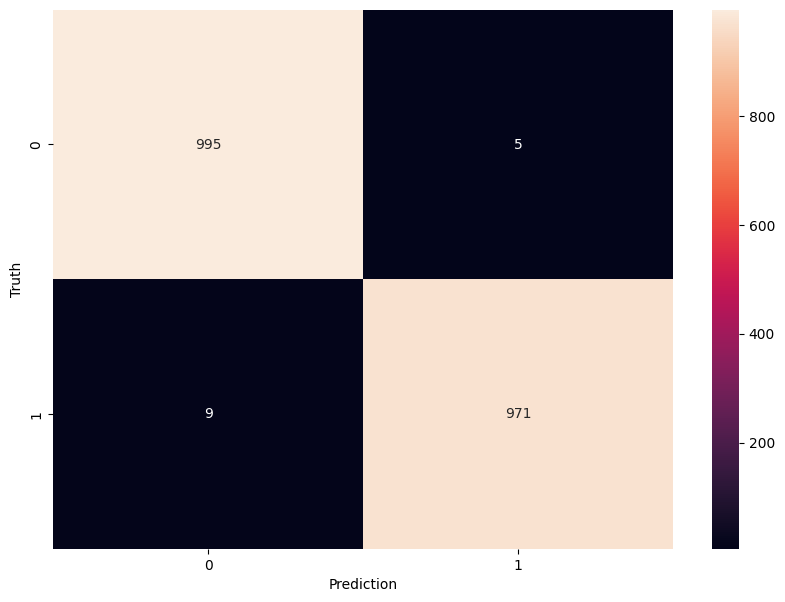

In [23]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')


## **Observations**

**1. Wtihtout preprocessing:**
In most cases, we observe performance degradation when using count vectorizers above trigrams. This is due to the significant increase in dimensions/features (word combinations) as the ngram_range increases, leading to overfitting and poor model performance. K-Nearest Neighbours (KNN) is particularly affected by high-dimensional data, as it struggles to calculate distances accurately, impacting its overall performance. However, using cosine distance for KNN improves recall and F1 scores, as it is not influenced by the number of dimensions and calculates similarity based on vector angles.

On the other hand, NaiveBayes and RandomForest models perform well, with RandomForest, especially with trigrams, demonstrating better recall. Random Forest overcomes high variance and overfitting by using Bootstrapping with multiple decision trees and considering word feature importance. The easy calculation of word probabilities and contingency table storage makes Multinomial NaiveBayes a friendly algorithm for text classification.

**2. With preprocessing:**
After training various models on unprocessed data, it was found that the best-performing model was RandomForest. However, when using trigrams as features for RandomForest, the results did not match the expected performance.

On the contrary, when using a combination of Unigram to Trigram features, the same RandomForest model yielded remarkable results, surpassing all other models in the list. The F1 scores and Recall scores were notably impressive, validating the effectiveness of this approach. The ability to extract valuable information from Unigram to Trigram features contributed significantly to the model's success, leading to highly accurate and reliable predictions.